# <a name="B1">Produisez une étude de marché</a>

## 1) Observations et nettoyages des données

In [1]:
# Chargement des librairies

import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from matplotlib import pyplot
from datetime import datetime
from datetime import timedelta
import plotly.express as px

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import pearsonr
import scipy.stats as stats

from sklearn import decomposition
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#from functions import *

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster


### a) Fichier disponibilité alimentaire

In [2]:
#chargement du fichier disponibilité alimentaire
dispo_alim= pd.read_csv('DisponibiliteAlimentaire_2017.csv')

In [3]:
# affichage des 5 premières lignes du df
dispo_alim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
# Affichage du nombre de lignes et colonnes du dataframe
dispo_alim.shape

(176600, 14)

In [5]:
# Recherche des valeurs manquantes
dispo_alim.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [6]:
# Affichage du type des variables du dataframe
dispo_alim.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [7]:
dispo_alim.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [8]:
print(dispo_alim['Année'].unique())

[2017]


In [9]:
print(dispo_alim['Produit'].unique())

['Blé et produits' 'Riz et produits' 'Orge et produits' 'Maïs et produits'
 'Seigle et produits' 'Avoine' 'Millet et produits' 'Sorgho et produits'
 'Céréales, Autres' 'Pommes de Terre et produits' 'Ignames' 'Racines nda'
 'Sucre, canne' 'Sucre, betterave' 'Sucre Eq Brut' 'Edulcorants Autres'
 'Miel' 'Haricots' 'Pois' 'Légumineuses Autres et produits'
 'Noix et produits' 'Soja' 'Arachides Decortiquees' 'Graines de tournesol'
 'Graines Colza/Moutarde' 'Graines de coton' 'Coco (Incl Coprah)' 'Sésame'
 'Olives' 'Plantes Oleiferes, Autre' 'Huile de Soja' "Huile d'Arachide"
 'Huile de Tournesol' 'Huile de Colza&Moutarde' 'Huile Graines de Coton'
 'Huile de Palmistes' 'Huile de Palme' 'Huile de Coco' 'Huile de Sésame'
 "Huile d'Olive" 'Huile de Son de Riz' 'Huile de Germe de Maïs'
 'Huil Plantes Oleif Autr' 'Tomates et produits' 'Oignons'
 'Légumes, Autres' 'Oranges, Mandarines' 'Citrons & Limes et produits'
 'Pamplemousse et produits' 'Agrumes, Autres' 'Bananes'
 'Pommes et produits' 'Anana

In [10]:
print(dispo_alim['Élément'].unique())

['Production' 'Importations - Quantité' 'Variation de stock'
 'Exportations - Quantité' 'Disponibilité intérieure'
 'Aliments pour animaux' 'Semences' 'Pertes' 'Résidus' 'Nourriture'
 'Disponibilité alimentaire en quantité (kg/personne/an)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'
 'Traitement' 'Autres utilisations (non alimentaire)'
 'Alimentation pour touristes']


In [11]:
#renommer la colonne valeur 
dispo_alim = dispo_alim.rename(columns ={ 'Valeur': 'Quantité'})

dispo_alim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Quantité,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [12]:
# filtrage des colonnes et lignes qu'on a besoin
elements=['Production','Importations - Quantité' ,'Exportations - Quantité', 'Disponibilité intérieure']
 
dispo_alim1= dispo_alim[(dispo_alim['Produit']=='Viande de Volailles') & (dispo_alim.Élément.isin(elements))]
dispo_alim1.head()        

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Quantité,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
1704,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1667.0,S,Données standardisées
1705,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,514.0,S,Données standardisées


In [13]:
dispo_alim1.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Quantité                  0
Symbole                   0
Description du Symbole    0
dtype: int64

In [14]:
dispo_alim2=pd.pivot_table(data=dispo_alim1, index='Zone', columns='Élément', values='Quantité')
dispo_alim2.head()

Élément,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,
Afghanistan,57.0,NaN,29.0,28.0
Afrique du Sud,2118.0,63.0,514.0,1667.0
Albanie,47.0,0.0,38.0,13.0
Algérie,277.0,0.0,2.0,275.0
Allemagne,1739.0,646.0,842.0,1514.0


In [15]:
dispo_alim2.isnull().sum()

Élément
Disponibilité intérieure     0
Exportations - Quantité     35
Importations - Quantité      0
Production                   2
dtype: int64

### b) Fichier Population

In [16]:
pop=pd.read_csv('Population_2000_2018.csv')

In [17]:
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [18]:
pop.shape

(4411, 15)

In [19]:
pop.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

In [20]:
print(pop['Élément'].unique())

['Population totale']


In [21]:
print(pop['Produit'].unique())

['Population-Estimations']


In [22]:
# renommer la colonne valeur et mettre en personnes
pop = pop.rename(columns ={ 'Valeur': 'Population'})
pers=['Population']

pop.head()


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Population,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


### c) Fichier PIB 

In [23]:
pib_stab=pd.read_excel('pib_stab.xlsx')

In [24]:
pib_stab.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Données de la sécurité alimentaire,Afghanistan,Valeur,PIB par habitant,2017,I$,2058.40
1,Données de la sécurité alimentaire,Afghanistan,Valeur,Stabilité politique,2017,indice,-2.80
2,Données de la sécurité alimentaire,Afrique du Sud,Valeur,PIB par habitant,2017,I$,12701.30
3,Données de la sécurité alimentaire,Afrique du Sud,Valeur,Stabilité politique,2017,indice,-0.28
4,Données de la sécurité alimentaire,Albanie,Valeur,PIB par habitant,2017,I$,12771.00


In [25]:
pib_stab.isnull().sum()

Domaine    0
Zone       0
Élément    0
Produit    0
Année      0
Unité      0
Valeur     0
dtype: int64

In [26]:
pib_stab1=pd.pivot_table(data=pib_stab, index='Zone', columns=['Produit'], values='Valeur')
pib_stab1.head()

Produit,PIB par habitant,Stabilité politique
Zone,,
Afghanistan,2058.4,-2.80
Afrique du Sud,12701.3,-0.28
Albanie,12771.0,0.38
Algérie,11737.4,-0.92
Allemagne,52952.9,0.59


In [27]:
pib_stab1.isnull().sum()

Produit
PIB par habitant       11
Stabilité politique     0
dtype: int64

In [28]:
pib_stab1.describe()

Produit,PIB par habitant,Stabilité politique
count,186.000000,197.000000
mean,20803.936022,-0.061777
std,22097.094515,0.994923
min,773.600000,-2.940000
25%,4613.375000,-0.670000
50%,12736.150000,0.040000
75%,28970.550000,0.770000
max,126184.000000,1.920000


### d) Fichier distance

In [29]:
#Distance de la France vers les autres pays
distance=pd.read_excel('distance.xlsx')

In [30]:
distance.head()

,Zone,distance(km)
0,Afghanistan,5590.381
1,Afrique du Sud,8692.812
2,Albanie,1603.534
3,Algérie,1340.390
4,Allemagne,880.187


In [31]:
distance.shape

(224, 2)

## 2) Jointures

In [32]:
#1ère jointure entre dispo_alim et population

df1= dispo_alim2.merge(pop.loc[pop['Année']== 2017, ['Zone','Population']],on='Zone')
df1.head()

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population
0,Afghanistan,57.0,NaN,29.0,28.0,36296.113
1,Afrique du Sud,2118.0,63.0,514.0,1667.0,57009.756
2,Albanie,47.0,0.0,38.0,13.0,2884.169
3,Algérie,277.0,0.0,2.0,275.0,41389.189
4,Allemagne,1739.0,646.0,842.0,1514.0,82658.409


In [33]:
df1.shape

(170, 6)

In [34]:
df1.isnull().sum()

Zone                         0
Disponibilité intérieure     0
Exportations - Quantité     35
Importations - Quantité      0
Production                   2
Population                   0
dtype: int64

In [35]:
# 2ème jointure entre df1 et pib_stab
df2= distance.merge( pib_stab1, on='Zone')
df2.head()

,Zone,distance(km),PIB par habitant,Stabilité politique
0,Afghanistan,5590.381,2058.4,-2.80
1,Afrique du Sud,8692.812,12701.3,-0.28
2,Albanie,1603.534,12771.0,0.38
3,Algérie,1340.390,11737.4,-0.92
4,Allemagne,880.187,52952.9,0.59


In [36]:
df2.shape

(189, 4)

In [37]:
df2.isnull().sum()

Zone                   0
distance(km)           0
PIB par habitant       7
Stabilité politique    0
dtype: int64

In [38]:
# 3ème jointure entre df2 et df1
df3=df1.merge(df2, on='Zone')
df3.head()


,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique
0,Afghanistan,57.0,NaN,29.0,28.0,36296.113,5590.381,2058.4,-2.80
1,Afrique du Sud,2118.0,63.0,514.0,1667.0,57009.756,8692.812,12701.3,-0.28
2,Albanie,47.0,0.0,38.0,13.0,2884.169,1603.534,12771.0,0.38
3,Algérie,277.0,0.0,2.0,275.0,41389.189,1340.390,11737.4,-0.92
4,Allemagne,1739.0,646.0,842.0,1514.0,82658.409,880.187,52952.9,0.59


In [39]:
df = df3.rename(columns ={ 'Zone': 'Pays'})
df.head()



,Pays,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique
0,Afghanistan,57.0,NaN,29.0,28.0,36296.113,5590.381,2058.4,-2.80
1,Afrique du Sud,2118.0,63.0,514.0,1667.0,57009.756,8692.812,12701.3,-0.28
2,Albanie,47.0,0.0,38.0,13.0,2884.169,1603.534,12771.0,0.38
3,Algérie,277.0,0.0,2.0,275.0,41389.189,1340.390,11737.4,-0.92
4,Allemagne,1739.0,646.0,842.0,1514.0,82658.409,880.187,52952.9,0.59


In [40]:
df.isna().sum()

Pays                         0
Disponibilité intérieure     0
Exportations - Quantité     34
Importations - Quantité      0
Production                   2
Population                   0
distance(km)                 0
PIB par habitant             5
Stabilité politique          0
dtype: int64

In [41]:
df.shape

(166, 9)

In [42]:
# Affichage des NAN de la variable Exportation
exportation=df.loc[df['Exportations - Quantité'].isnull()]
exportation.head()


,Pays,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique
0,Afghanistan,57.0,NaN,29.0,28.0,36296.113,5590.381,2058.4,-2.80
13,Bahamas,26.0,NaN,24.0,6.0,381.755,7209.450,36298.4,0.99
14,Bangladesh,250.0,NaN,0.0,249.0,159685.424,7916.790,4160.7,-1.26
23,Burkina Faso,46.0,NaN,0.0,46.0,19193.234,4082.870,2044.4,-0.93
26,Cabo Verde,10.0,NaN,12.0,1.0,537.498,4452.386,6643.2,0.77


In [43]:
#Affichage des NAN de la variable PIB
df.loc[df['PIB par habitant'].isnull()]

,Pays,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique
33,"Chine, Taiwan Province de",785.0,8.0,161.0,652.0,23674.546,9834.232,NaN,0.86
39,Cuba,342.0,NaN,312.0,29.0,11339.254,7729.485,NaN,0.65
126,République populaire démocratique de Corée,43.0,0.0,0.0,43.0,25429.825,8783.568,NaN,-0.50
155,Venezuela (République bolivarienne du),626.0,0.0,25.0,600.0,29402.484,7618.860,NaN,-1.25
157,Yémen,246.0,0.0,78.0,168.0,27834.819,5317.261,NaN,-2.94


In [44]:
#replacer les NAN de la variable PIB par des valeurs
df.loc[33,'PIB par habitant']= 50500
df.loc[39,'PIB par habitant']= 8541.21
df.loc[126,'PIB par habitant']= 31616.84
df.loc[155,'PIB par habitant']= 12500
df.loc[157,'PIB par habitant']= 964.34



In [45]:
df.describe()

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique
count,166.000000,132.000000,166.000000,164.000000,1.660000e+02,166.000000,166.000000,166.000000
mean,594.060241,130.772727,88.746988,631.152439,3.553894e+04,5915.954501,20435.650542,-0.066566
std,1741.505572,517.939231,186.505071,2124.108733,1.125962e+05,3810.166502,20794.228557,0.907625
min,2.000000,0.000000,0.000000,0.000000,5.204500e+01,50.000000,912.800000,-2.940000
25%,32.000000,0.000000,3.000000,14.750000,2.893339e+03,2689.129750,4844.400000,-0.637500
50%,105.000000,2.500000,16.000000,70.000000,9.815582e+03,5586.441500,12736.150000,-0.020000
75%,368.250000,30.500000,81.250000,409.750000,2.971320e+04,8687.385000,29368.175000,0.650000
max,18266.000000,4223.000000,1069.000000,21914.000000,1.338677e+06,19263.880000,126184.000000,1.590000


In [46]:
df.fillna(0, inplace= True)#remplacer les NAN par 0, il y a 36 valeurs manquantes en tout.
print(df.shape)
df.columns

(166, 9)


Index(['Pays', 'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Production', 'Population', 'distance(km)',
       'PIB par habitant', 'Stabilité politique'],
      dtype='object')

In [47]:
df.to_csv('df1.csv',sep=",",index=False)
print('\nCSV String:\n', df1) 



CSV String:
                       Zone  Disponibilité intérieure  Exportations - Quantité  \
0              Afghanistan                      57.0                      NaN   
1           Afrique du Sud                    2118.0                     63.0   
2                  Albanie                      47.0                      0.0   
3                  Algérie                     277.0                      0.0   
4                Allemagne                    1739.0                    646.0   
..                     ...                       ...                      ...   
165    Émirats arabes unis                     412.0                     94.0   
166               Équateur                     341.0                      0.0   
167  États-Unis d'Amérique                   18266.0                   3692.0   
168               Éthiopie                      14.0                      NaN   
169           Îles Salomon                       3.0                      0.0   

     Importat

In [48]:
df=df.set_index('Pays')

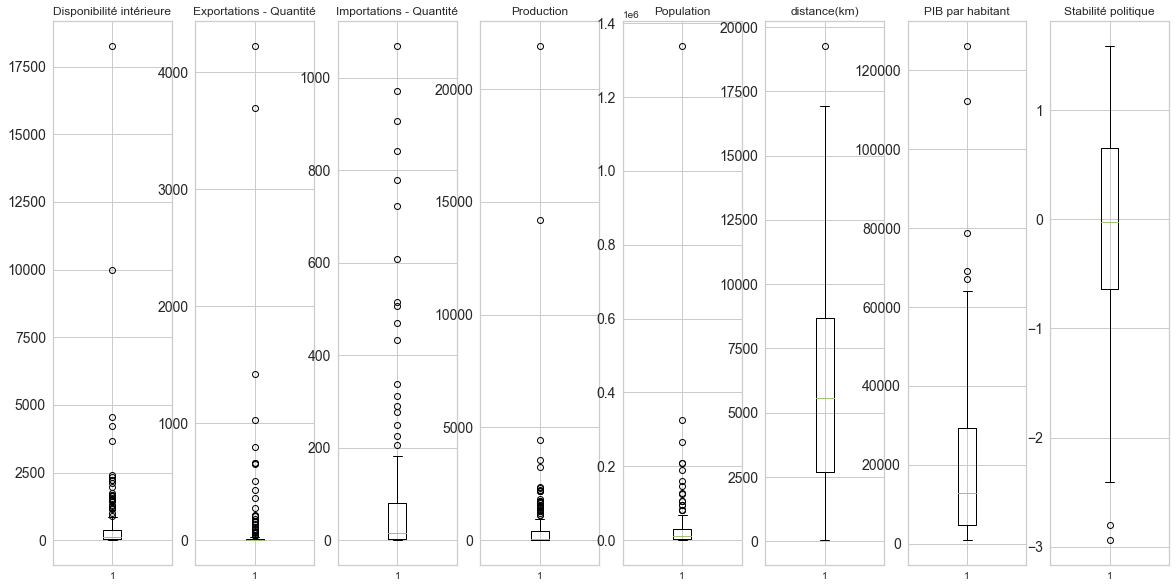

In [49]:
#détection des outliers

fig, axs=plt.subplots(1,len(df.columns),figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i])
    df.iloc[:,i]
    ax.set_title(df.columns[i], fontsize=12)
    ax.tick_params(axis='y',labelsize=14)

In [50]:
df_ss_outliers = df.loc[["États-Unis d\'Amérique", "Inde", "Brésil"],:]# J'ai obtenu ces outliers en faisant un ACP
df_ss_outliers


,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique
Pays,,,,,,,,
États-Unis d'Amérique,18266.0,3692.0,123.0,21914.0,325084.756,6169.154,60109.7,0.34
Inde,3661.0,4.0,0.0,3545.0,1338676.785,6594.230,6182.9,-0.76
Brésil,9982.0,4223.0,3.0,14201.0,207833.823,8732.790,14524.6,-0.42


In [51]:
outliers = ['Inde', 'États-Unis d\'Amérique', 'Brésil']
df.drop(outliers,inplace=True)
df


,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique
Pays,,,,,,,,
Afghanistan,57.0,0.0,29.0,28.0,36296.113,5590.381,2058.4,-2.80
Afrique du Sud,2118.0,63.0,514.0,1667.0,57009.756,8692.812,12701.3,-0.28
Albanie,47.0,0.0,38.0,13.0,2884.169,1603.534,12771.0,0.38
Algérie,277.0,0.0,2.0,275.0,41389.189,1340.390,11737.4,-0.92
Allemagne,1739.0,646.0,842.0,1514.0,82658.409,880.187,52952.9,0.59
...,...,...,...,...,...,...,...,...
Égypte,1250.0,1.0,110.0,1118.0,96442.591,3215.215,11014.5,-1.42
Émirats arabes unis,412.0,94.0,433.0,48.0,9487.203,5249.535,67183.6,0.62
Équateur,341.0,0.0,0.0,340.0,16785.361,9367.098,11617.9,-0.07


## 2) Analyse

### a) ACP( méthode factorielle)

In [52]:
# Preparation des données pour l'ACP
X= df
names = df.index
nom_variable = df.columns

In [53]:
#Standardisation(centrage et réduction)
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [54]:
X.head()

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique
Pays,,,,,,,,
Afghanistan,57.0,0.0,29.0,28.0,36296.113,5590.381,2058.4,-2.80
Afrique du Sud,2118.0,63.0,514.0,1667.0,57009.756,8692.812,12701.3,-0.28
Albanie,47.0,0.0,38.0,13.0,2884.169,1603.534,12771.0,0.38
Algérie,277.0,0.0,2.0,275.0,41389.189,1340.390,11737.4,-0.92
Allemagne,1739.0,646.0,842.0,1514.0,82658.409,880.187,52952.9,0.59


In [55]:
# calcul des composantes principales
pca = decomposition.PCA(n_components=8) # correspond aux 8 variables
pca.fit(X_scaled)



PCA(n_components=8)

In [56]:
# Je crée une df qui affiche la variance expliquée pour chaque dimension.
variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(8)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance


,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.082022,38.0,38.0
1,Dim2,1.955040,24.0,63.0
2,Dim3,1.103349,14.0,76.0
3,Dim4,0.706766,9.0,85.0
4,Dim5,0.552732,7.0,92.0
5,Dim6,0.378470,5.0,97.0
6,Dim7,0.266496,3.0,100.0
7,Dim8,0.004508,0.0,100.0


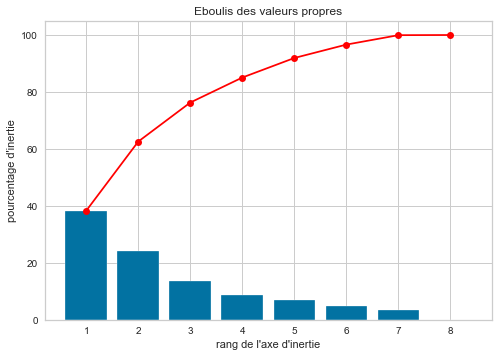

In [57]:
# Eboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
display_scree_plot(pca)


In [58]:
# Calcul des composantes principales
n_comp = 3  # les 3 composantes principales représentent 76% des données
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


PCA(n_components=3)

In [59]:
res_pca = pca.fit_transform(X_scaled)


### Cercle de corrélation

In [60]:
# Fonction qui me permet d'afficher mes cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:],
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
           
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
           
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
       
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)






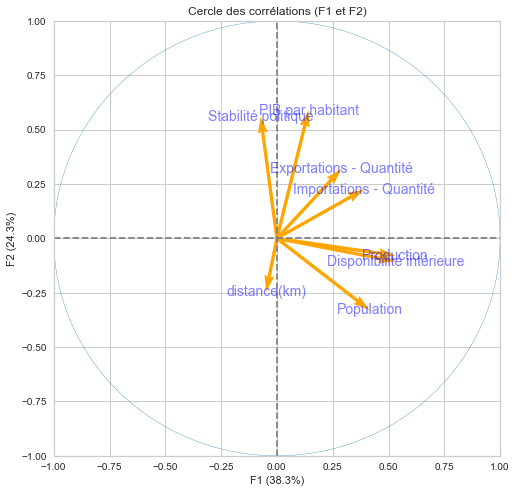

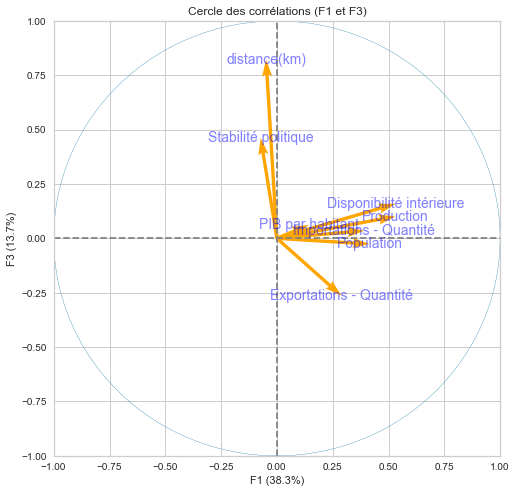

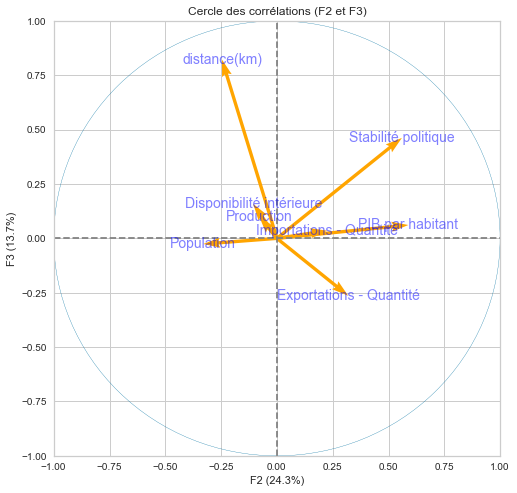

In [61]:
pcs = pca.components_
display_circles(pcs,n_comp , pca, [(0,1),(0,2),(1,2)], labels = np.array(nom_variable))


Les variables les plus colérrés à F1 sont:<br/>
- Production<br/>
- Disponibilité intérieure<br/>
F1 peut représenter la "quantité" de volailles disponibles  dans un pays<br/><br/>
Les variables les plus colérrés à F2 sont:<br/>
- PIB par habitant<br/>
- Stabilité politique<br/>
F2 peut représenter la "qualité de vie" d'un pays<br/><br/>
La variable "Distance" est très colérrée à F3. Les autres variables comme "Exportation","Importation" et "Population" ne sont pas très bien représentés sur les 3 composantes principales.


### Représentation des individus sur les 3 plans factoriels

In [62]:
# Fonction qui permet de projeter les individus sur les dimensions
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure      
            fig = plt.figure(figsize=(10,10))
       
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center')
               
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
       
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)





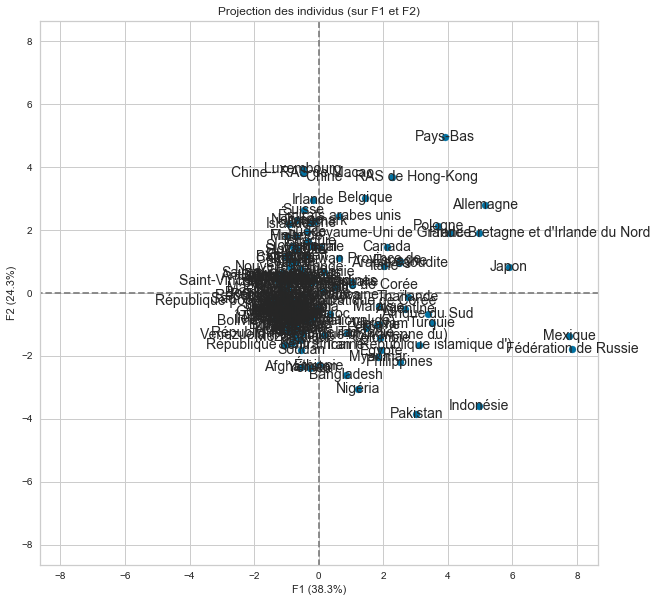

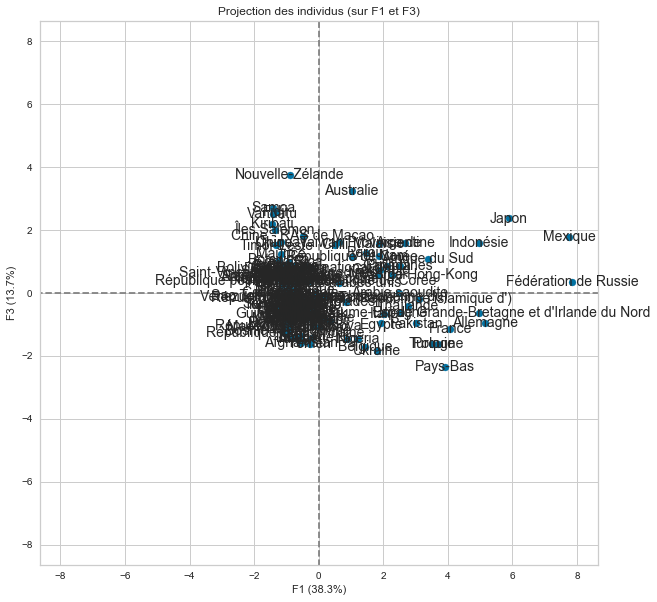

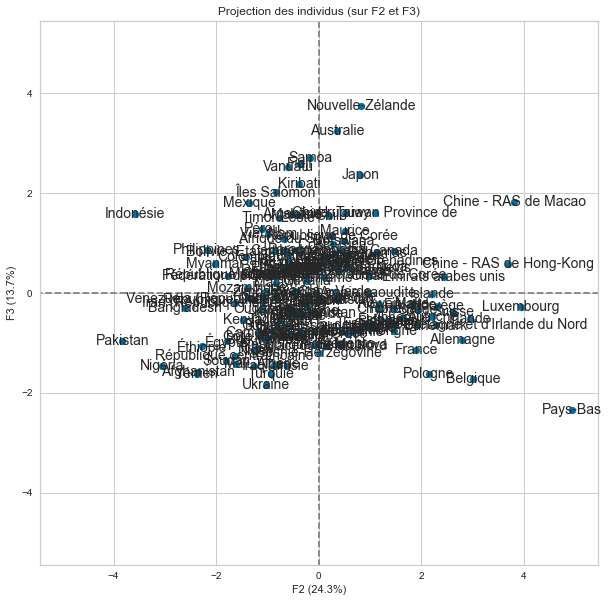

<Figure size 576x396 with 0 Axes>

In [63]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(names))
plt.figure()
plt.show()


In [64]:
# Transformation en DataFrame pandas
res_pca_df = pd.DataFrame({
    "Dim1" : res_pca[:,0], 
    "Dim2" : res_pca[:,1],
    "Dim3":  res_pca[:,2],
    "Pays":  df.index
    
})

# Résultat (premières lignes)
res_pca_df.head()


,Dim1,Dim2,Dim3,Pays
0,-0.532646,-2.361060,-1.573552,Afghanistan
1,3.374123,-0.669950,1.077115,Afrique du Sud
2,-1.008912,0.445890,-0.765564,Albanie
3,-0.218622,-0.789926,-1.428616,Algérie
4,5.161264,2.794612,-0.944924,Allemagne


### b) CAH ( Classification ascendante hierarchique)

In [65]:
# Préparation des données
X=res_pca_df.set_index('Pays').values
names =res_pca_df.index
nom_variable = df.columns


In [66]:
# CAH
Z=linkage(X, 'ward')

In [67]:
# Dendrogramme
def plot_dendrogram(Z, names):
    plt.figure(figsize=(15,10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Distance')
    plt.axhline(y =11, linewidth = .5, c = "dimgray", linestyle = "--")
    dendrogram(
        Z,
        labels = names,
        orientation = "top",
    color_threshold=7,)
    plt.show()


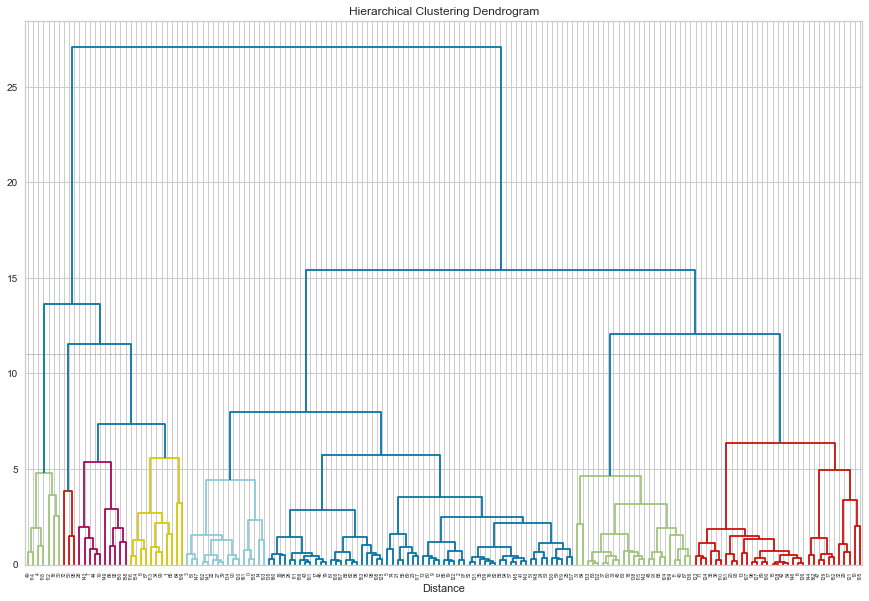

In [68]:
# Affichage du dendrogramme
plot_dendrogram(Z, names)


In [69]:
# Découpe du dendrogramme en 6 clusters
clusters = fcluster(Z, 6, criterion='maxclust')

# Création d'un df avec une colonne cluster et une colonne pays
groupes = pd.DataFrame({"cluster": clusters, "Pays": names})
print(groupes)


     cluster  Pays
0          4     0
1          3     1
2          4     2
3          4     3
4          1     4
..       ...   ...
158        3   158
159        5   159
160        4   160
161        4   161
162        6   162

[163 rows x 2 columns]


In [70]:
clusters

array([4, 3, 4, 4, 1, 4, 6, 3, 3, 4, 6, 5, 4, 6, 4, 6, 1, 4, 4, 4, 6, 4,
       4, 4, 4, 4, 4, 4, 3, 6, 1, 5, 6, 5, 3, 4, 6, 5, 6, 4, 5, 4, 6, 4,
       3, 5, 4, 6, 5, 1, 2, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 5, 3, 3,
       3, 5, 5, 4, 3, 6, 2, 4, 4, 4, 4, 6, 5, 4, 5, 4, 4, 5, 5, 4, 4, 3,
       4, 6, 4, 5, 3, 6, 4, 2, 6, 4, 4, 3, 6, 4, 4, 4, 5, 6, 4, 6, 4, 3,
       6, 4, 1, 3, 1, 5, 3, 4, 1, 4, 4, 6, 4, 6, 6, 4, 6, 6, 6, 6, 4, 4,
       5, 5, 4, 4, 5, 4, 5, 4, 4, 4, 5, 3, 6, 4, 6, 4, 4, 3, 3, 6, 6, 4,
       3, 4, 4, 4, 3, 5, 4, 4, 6], dtype=int32)

In [71]:
groupes['cluster'].value_counts()


4    76
6    33
5    23
3    21
1     7
2     3
Name: cluster, dtype: int64

In [72]:

hierarchy_pca_df = pd.DataFrame(data= clusters, columns = ["Segment Hierarchy PCA"])

hierarchy_pca_df

,Segment Hierarchy PCA
0,4
1,3
2,4
3,4
4,1
...,...
158,3
159,5
160,4
161,4


In [73]:
# Mise à l'échelle des données
df_scaled = pd.DataFrame(X_scaled, columns= list(nom_variable), index=df.index)
df_scaled.head()


,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique
Pays,,,,,,,,
Afghanistan,-0.487730,-0.314933,-0.323454,-0.515029,0.289492,-0.079072,-0.883986,-3.006195
Afrique du Sud,2.366096,0.031213,2.264931,1.805855,0.807083,0.731677,-0.368683,-0.238709
Albanie,-0.501577,-0.314933,-0.275422,-0.536269,-0.545404,-1.120941,-0.365308,0.486109
Algérie,-0.183101,-0.314933,-0.467550,-0.165268,0.416757,-1.189708,-0.415353,-0.941562
Allemagne,1.841302,3.234438,4.015427,1.589201,1.447991,-1.309971,1.580201,0.716733


In [74]:
df_pca_clusters = pd.concat([df_scaled.reset_index(drop=True),res_pca_df], axis = 1)

df_pca_clusters.head()

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique,Dim1,Dim2,Dim3,Pays
0,-0.487730,-0.314933,-0.323454,-0.515029,0.289492,-0.079072,-0.883986,-3.006195,-0.532646,-2.361060,-1.573552,Afghanistan
1,2.366096,0.031213,2.264931,1.805855,0.807083,0.731677,-0.368683,-0.238709,3.374123,-0.669950,1.077115,Afrique du Sud
2,-0.501577,-0.314933,-0.275422,-0.536269,-0.545404,-1.120941,-0.365308,0.486109,-1.008912,0.445890,-0.765564,Albanie
3,-0.183101,-0.314933,-0.467550,-0.165268,0.416757,-1.189708,-0.415353,-0.941562,-0.218622,-0.789926,-1.428616,Algérie
4,1.841302,3.234438,4.015427,1.589201,1.447991,-1.309971,1.580201,0.716733,5.161264,2.794612,-0.944924,Allemagne


In [75]:
df_pca_hierar = pd.concat([df_pca_clusters, hierarchy_pca_df], axis = 1).set_index('Pays')
df_pca_hierar.head()


,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique,Dim1,Dim2,Dim3,Segment Hierarchy PCA
Pays,,,,,,,,,,,,
Afghanistan,-0.487730,-0.314933,-0.323454,-0.515029,0.289492,-0.079072,-0.883986,-3.006195,-0.532646,-2.361060,-1.573552,4
Afrique du Sud,2.366096,0.031213,2.264931,1.805855,0.807083,0.731677,-0.368683,-0.238709,3.374123,-0.669950,1.077115,3
Albanie,-0.501577,-0.314933,-0.275422,-0.536269,-0.545404,-1.120941,-0.365308,0.486109,-1.008912,0.445890,-0.765564,4
Algérie,-0.183101,-0.314933,-0.467550,-0.165268,0.416757,-1.189708,-0.415353,-0.941562,-0.218622,-0.789926,-1.428616,4
Allemagne,1.841302,3.234438,4.015427,1.589201,1.447991,-1.309971,1.580201,0.716733,5.161264,2.794612,-0.944924,1


In [76]:
df_pca_hierar["Hierarchy segment"] = df_pca_hierar["Segment Hierarchy PCA"].map( {4:"group 1",
                                                                                  6:"group 2",
                                                                                 5:"group 3",
                                                                                 3:"group 4",
                                                                                  2: "group 5",
                                                                                  1: "group 6"})
df_pca_hierar.drop(["Segment Hierarchy PCA"], axis=1, inplace=True)
df_pca_hierar.head()


,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique,Dim1,Dim2,Dim3,Hierarchy segment
Pays,,,,,,,,,,,,
Afghanistan,-0.487730,-0.314933,-0.323454,-0.515029,0.289492,-0.079072,-0.883986,-3.006195,-0.532646,-2.361060,-1.573552,group 1
Afrique du Sud,2.366096,0.031213,2.264931,1.805855,0.807083,0.731677,-0.368683,-0.238709,3.374123,-0.669950,1.077115,group 4
Albanie,-0.501577,-0.314933,-0.275422,-0.536269,-0.545404,-1.120941,-0.365308,0.486109,-1.008912,0.445890,-0.765564,group 1
Algérie,-0.183101,-0.314933,-0.467550,-0.165268,0.416757,-1.189708,-0.415353,-0.941562,-0.218622,-0.789926,-1.428616,group 1
Allemagne,1.841302,3.234438,4.015427,1.589201,1.447991,-1.309971,1.580201,0.716733,5.161264,2.794612,-0.944924,group 6


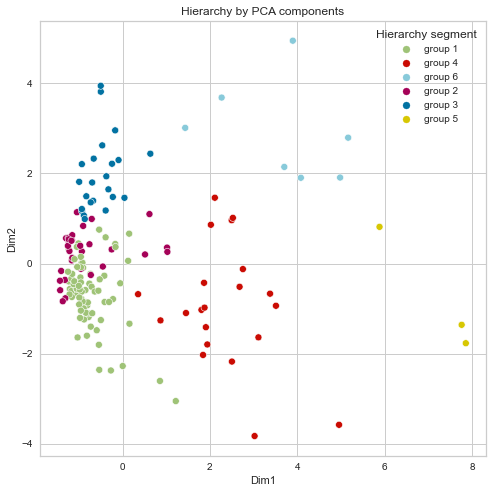

In [77]:
# Visualisation utilisant le 1er et 2nd PCA et le regroupement des individus utilisant la CAH

plt.figure(figsize = (8,8))
sns.scatterplot(x= df_pca_hierar["Dim1"], y= df_pca_hierar["Dim2"], hue = df_pca_hierar["Hierarchy segment"], palette = ['g','r','c','m','b','y'])
plt.title("Hierarchy by PCA components")
plt.show()


### Centroïdes de la méthode CAH

In [78]:
#  centroides
hierarchy_grouped = df_pca_hierar.groupby(["Hierarchy segment"]).mean()
hierarchy_grouped


,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique,Dim1,Dim2,Dim3
Hierarchy segment,,,,,,,,,,,
group 1,-0.401807,-0.288979,-0.316362,-0.413205,-0.136545,-0.108178,-0.591774,-0.557478,-0.734730,-0.677298,-0.419717
group 2,-0.341961,-0.275806,-0.282700,-0.349653,-0.461945,1.056864,-0.009926,0.818899,-0.861214,0.256984,1.231837
group 3,-0.394656,-0.097546,-0.108123,-0.404024,-0.493983,-1.010910,1.552391,1.079619,-0.508715,1.948652,-0.305556
group 4,1.460845,0.322677,0.333744,1.475446,1.239176,0.143178,-0.055223,-0.675377,2.331326,-0.947990,0.077427
group 5,4.598200,-0.069517,3.554677,4.122018,2.696013,0.326474,0.414235,-0.022728,7.162965,-0.772355,1.502848
group 6,0.918116,3.819982,2.598105,1.269177,0.410349,-1.055746,1.359203,0.680649,3.644748,2.914287,-1.122695


### Heatmap des groupes hierarchiques

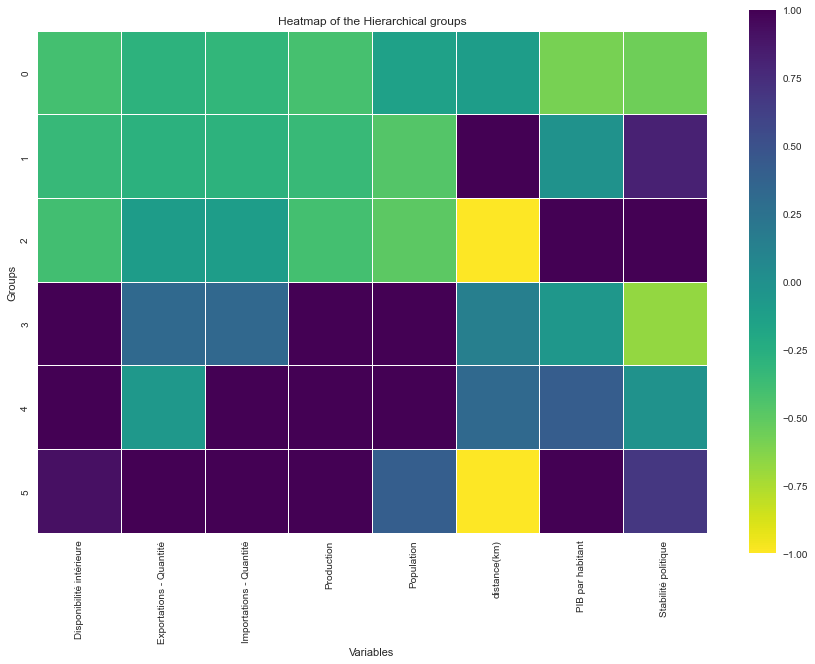

In [79]:
hierarchy_grouped_df= hierarchy_grouped.reset_index(drop=True).drop(columns=['Dim1','Dim2','Dim3'],axis=1)


pyplot.figure(figsize=(15, 10))

ax = sns.heatmap(hierarchy_grouped_df, linewidth=0.5,cmap='viridis_r', vmin=-1, vmax=1,square=True
)
ax.set(title="Heatmap of the Hierarchical groups",
      xlabel="Variables",
      ylabel="Groups",
      )

plt.show()


###  c) K-Means

In [80]:
kmeans= KMeans(n_clusters= 6)
kmeans.fit(X_projected)


C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [81]:
kmeans.labels_


array([4, 3, 4, 4, 1, 4, 0, 1, 3, 4, 0, 2, 4, 0, 3, 0, 1, 0, 0, 4, 0, 2,
       4, 4, 4, 0, 0, 4, 1, 0, 1, 2, 0, 2, 3, 4, 0, 2, 0, 4, 2, 4, 0, 0,
       1, 2, 0, 0, 2, 1, 5, 4, 4, 4, 0, 2, 4, 4, 4, 0, 4, 4, 4, 2, 5, 3,
       4, 2, 2, 4, 1, 0, 5, 4, 4, 4, 4, 0, 2, 0, 2, 4, 4, 2, 2, 4, 4, 3,
       4, 0, 4, 2, 4, 0, 4, 5, 0, 4, 4, 3, 0, 0, 4, 3, 2, 0, 4, 2, 4, 3,
       0, 0, 1, 3, 1, 2, 3, 2, 1, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 4, 4,
       2, 2, 4, 0, 2, 0, 2, 4, 4, 4, 2, 3, 0, 4, 0, 4, 4, 3, 3, 0, 0, 4,
       3, 4, 0, 4, 3, 2, 0, 4, 0])

#### Méthode Elbow

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

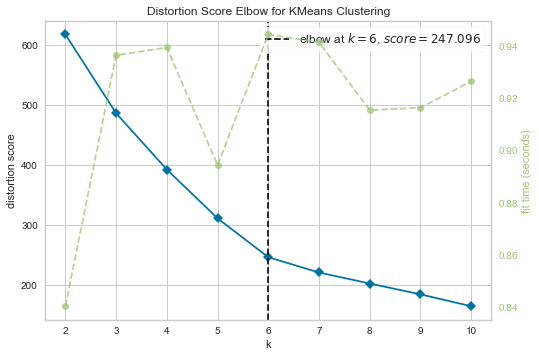

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X_projected)    
elb_visualizer.show()  


In [83]:

df_pca_clusters["Segment K-means PCA"] = kmeans.labels_
df_pca_clusters.head()


,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique,Dim1,Dim2,Dim3,Pays,Segment K-means PCA
0,-0.487730,-0.314933,-0.323454,-0.515029,0.289492,-0.079072,-0.883986,-3.006195,-0.532646,-2.361060,-1.573552,Afghanistan,4
1,2.366096,0.031213,2.264931,1.805855,0.807083,0.731677,-0.368683,-0.238709,3.374123,-0.669950,1.077115,Afrique du Sud,3
2,-0.501577,-0.314933,-0.275422,-0.536269,-0.545404,-1.120941,-0.365308,0.486109,-1.008912,0.445890,-0.765564,Albanie,4
3,-0.183101,-0.314933,-0.467550,-0.165268,0.416757,-1.189708,-0.415353,-0.941562,-0.218622,-0.789926,-1.428616,Algérie,4
4,1.841302,3.234438,4.015427,1.589201,1.447991,-1.309971,1.580201,0.716733,5.161264,2.794612,-0.944924,Allemagne,1


In [85]:
df_pca_clusters["KMeans segment"] = df_pca_clusters["Segment K-means PCA"].map({0:"group 1",
                                                                              1:"group 2",
                                                                              2:"group 3",
                                                                            3:"group 4",
                                                                               4: "group 5",
                                                                               5: "group 6"
                                                                                
                                                                                             })
df_pca_clusters.drop(["Segment K-means PCA"], axis=1, inplace=True)
df_pca_clusters


,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique,Dim1,Dim2,Dim3,Pays,KMeans segment
0,-0.487730,-0.314933,-0.323454,-0.515029,0.289492,-0.079072,-0.883986,-3.006195,-0.532646,-2.361060,-1.573552,Afghanistan,group 5
1,2.366096,0.031213,2.264931,1.805855,0.807083,0.731677,-0.368683,-0.238709,3.374123,-0.669950,1.077115,Afrique du Sud,group 4
2,-0.501577,-0.314933,-0.275422,-0.536269,-0.545404,-1.120941,-0.365308,0.486109,-1.008912,0.445890,-0.765564,Albanie,group 5
3,-0.183101,-0.314933,-0.467550,-0.165268,0.416757,-1.189708,-0.415353,-0.941562,-0.218622,-0.789926,-1.428616,Algérie,group 5
4,1.841302,3.234438,4.015427,1.589201,1.447991,-1.309971,1.580201,0.716733,5.161264,2.794612,-0.944924,Allemagne,group 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.164193,-0.309438,0.108833,1.028451,1.792429,-0.699766,-0.450354,-1.490667,1.939530,-1.797857,-0.964216,Égypte,group 4
159,0.003831,0.201539,1.832644,-0.486708,-0.380408,-0.168144,2.269217,0.749679,0.635925,2.438663,0.320590,Émirats arabes unis,group 3
160,-0.094481,-0.314933,-0.478223,-0.073226,-0.198042,0.907886,-0.421139,-0.008085,-0.552201,-0.603348,0.765695,Équateur,group 1
161,-0.547272,-0.314933,-0.472887,-0.534853,2.041242,-0.081131,-0.885768,-1.776201,0.003695,-2.276121,-1.069061,Éthiopie,group 5


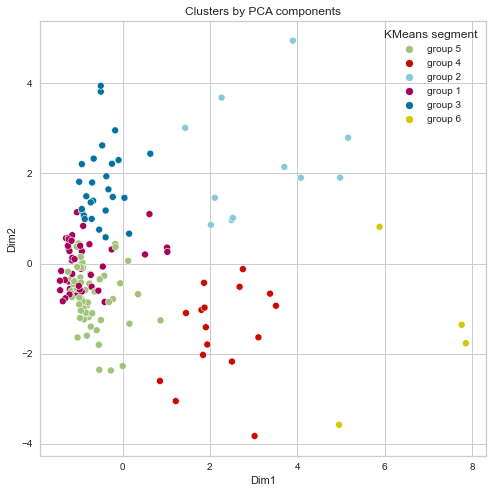

In [86]:
# Visualisation utilisant le 1er et 2nd PCA et le regroupement des individus utilisant le K-means
plt.figure(figsize = (8,8))
sns.scatterplot(x= df_pca_clusters["Dim1"], 
                y= df_pca_clusters["Dim2"],
                hue = df_pca_clusters["KMeans segment"], 
                palette = ['g','r','c','m','b','y'])
plt.title("Clusters by PCA components")
plt.show()


### Centroïdes avec la méthode K-Means

In [87]:
cluster_grouped = df_pca_clusters.groupby(["KMeans segment"]).mean()
cluster_grouped


,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique,Dim1,Dim2,Dim3
KMeans segment,,,,,,,,,,,
group 1,-0.364343,-0.286983,-0.341785,-0.360527,-0.450263,0.967740,-0.186998,0.587813,-0.904349,0.027738,1.036822
group 2,1.075322,2.600087,2.064556,1.231974,0.439025,-0.934580,1.285165,0.568974,3.151353,2.245180,-0.755857
group 3,-0.377571,-0.097396,-0.072225,-0.386904,-0.473415,-0.979395,1.367216,0.973388,-0.488029,1.770577,-0.334971
group 4,1.339702,0.326536,0.027112,1.439721,1.562658,0.384585,-0.359261,-0.989609,2.231487,-1.521329,0.068959
group 5,-0.385663,-0.296121,-0.265472,-0.417394,-0.176629,-0.278170,-0.635426,-0.732158,-0.712430,-0.737940,-0.636004
group 6,4.111139,-0.130871,2.547786,3.767419,3.520912,0.616677,0.197133,-0.137124,6.610375,-1.474691,1.521430


### Heatmap avec la méthode K-Means

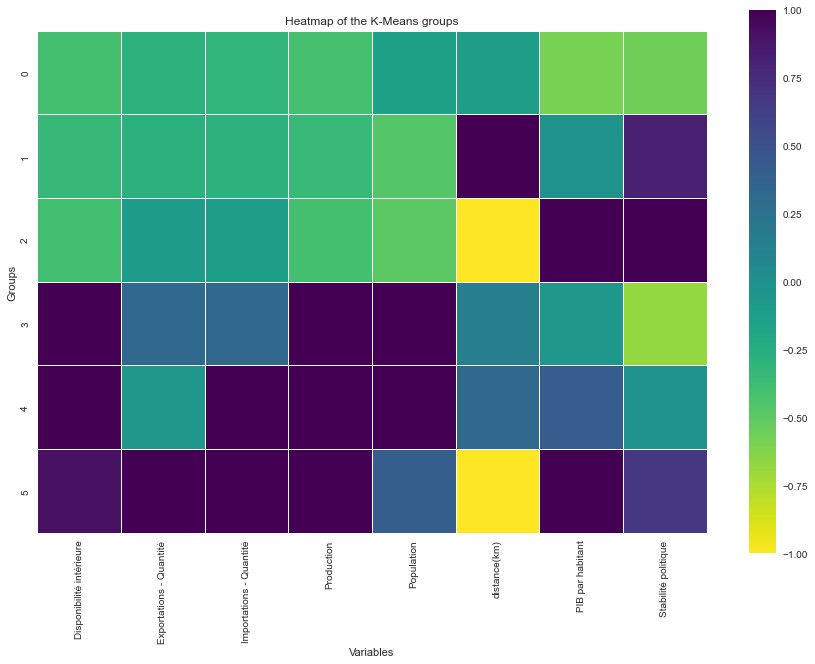

In [88]:
# creer heatmap

pyplot.figure(figsize=(15, 10))

ax = sns.heatmap(hierarchy_grouped_df, linewidth=0.5,cmap='viridis_r', vmin=-1, vmax=1,square=True)
ax.set(title="Heatmap of the K-Means groups",
      xlabel="Variables",
      ylabel="Groups",)
plt.show()


## d) Conclusion

In [96]:
# Trouver les pays les plus intérressants
group_5_hier = df_pca_hierar[df_pca_hierar["Hierarchy segment"] == "group 5"]
group_5_hier



,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique,Dim1,Dim2,Dim3,Hierarchy segment
Pays,,,,,,,,,,,,
Fédération de Russie,5.741946,0.316921,0.727911,5.738187,3.019025,-0.888156,0.271644,-0.634064,7.852604,-1.769875,0.347211,group 5
Japon,2.777346,-0.259989,5.226898,2.581843,2.568558,1.001579,0.999854,1.287801,5.878639,0.813856,2.367781,group 5
Mexique,5.275309,-0.265483,4.709221,4.046024,2.500456,0.865999,-0.028792,-0.721921,7.757654,-1.361047,1.793552,group 5


In [95]:
group_2_kmeans = df_pca_clusters[df_pca_clusters["KMeans segment"] == "group 2"]
group_2_kmeans


,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,distance(km),PIB par habitant,Stabilité politique,Dim1,Dim2,Dim3,Pays,KMeans segment
4,1.841302,3.234438,4.015427,1.589201,1.447991,-1.309971,1.580201,0.716733,5.161264,2.794612,-0.944924,Allemagne,group 2
7,1.420359,-0.259989,3.375002,0.317600,0.209657,-0.313189,1.306802,-0.568171,2.495930,0.961806,0.000228,Arabie saoudite,group 2
16,-0.356186,3.289382,1.325641,0.100947,-0.332117,-1.471420,1.458644,0.541019,1.433560,3.012873,-1.728658,Belgique,group 2
28,1.417590,0.580652,0.493088,1.451846,0.300386,-0.062652,1.355747,1.276819,2.111375,1.461014,0.849553,Canada,group 2
30,-0.178947,3.327842,4.362324,-0.520693,-0.434904,0.979065,1.914103,0.980303,2.266831,3.685523,0.582279,Chine - RAS de Hong-Kong,group 2
44,1.506209,0.849876,0.615836,1.590617,0.548150,-1.264378,0.930244,0.376288,2.523952,1.013610,-0.625679,Espagne,group 2
49,1.611445,2.437753,2.222236,1.923386,1.002808,-1.526921,1.174665,0.376288,4.078832,1.904301,-1.150086,France,group 2
70,1.057573,0.690539,0.039454,1.307410,0.898638,-1.249941,1.029606,0.409234,2.020396,0.860543,-0.679665,Italie,group 2
112,-0.051556,7.476101,2.766598,1.002962,-0.192145,-1.428162,1.683606,1.079142,3.895198,4.948298,-2.348390,Pays-Bas,group 2
114,1.034033,5.316809,-0.184695,2.774423,0.330899,-1.182446,0.472001,0.639858,3.700499,2.145154,-1.621325,Pologne,group 2
